In [ ]:
using Plots
using Revise
using LatticeQM

Computing bands... 100%|████████████████████████████████| Time: 0:00:03


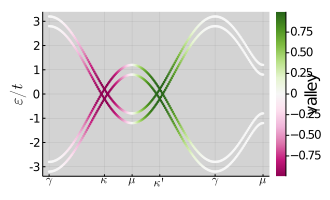

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/wolft/.julia/packages/Plots/ninUP/src/backends/gr.jl:491


In [5]:
using Plots

# Load a lattice geometry
lat = Geometries2D.honeycomb()

# Construct graphene tight-binding Hamiltonian
hops = Operators.graphene(lat; mode=:spinhalf)

# Modify graphene Hamiltonian
#Operators.addhaldane!(hops, lat, 0.1; spinhalf=true)
Operators.addzeeman!(hops, lat, 0.2)

# Construct valley operator
valley = Operators.valleyoperator(lat; spinhalf=true)

# Get bands along (default) high-symmetry path
# and compute the expectation value of the valley operator for each eigenstate.
ks = kpath(lat; num_points=200)
bands = getbands(hops, ks, valley)

# Show bands
# save(bands, "bands.h5")
plot(bands, ylabel="\$\\varepsilon/t\$", colorbar_title="valley", size=(330,200), colorbar=true, markercolor=:PiYG)

In [2]:
?LatticeQM

search: LatticeQM



```
LatticeQM
```

Library for tight-binding models defined on (periodic) lattices, providing  convenient functions to build the operators and to obtain bands, expectation values, topological indices, linear response coefficients and mean-field solutions.

## Submodules

  * Algebra
  * Structure
  * TightBinding
  * Spectrum
  * Green
  * Operators
  * LinearResponse
  * Meanfield
  * Geometries2D

Any of these modules can be further explored, e.g., with `?TightBinding`

## Usage examples

See folder `examples` of the package.


# Tutorial: Lattices

A lattice is characterized by a set of lattice vectors $\vec{a}_1$, $\dots$, $\vec{a}_d$ in real space $\mathbb{R}^{D>d}$. If $d<D$, we can always find additional basis vectors to span the space that is not covered by the lattice, i.e. $\vec{e}_{d+1}$, $\dots$, $\vec{e}_D$.

These lattice vectors define a *primitive unit cell* that contains a finite number $N$ of atoms/orbitals at positions $\vec{r}_1$, $\dots$, $\vec{r}_N$. These positions can be written in *fractional coordinates* as $\vec{r}_i = \sum_{j=1}^d x_j \vec{a}_j + \sum_{j=d+1}^D x_j \vec{e}_j$.

In [ ]:
## Define real-space basis
lat = Lattice() # 0D lattice
addbasis!(lat, [1,0,0]) # 1D lattice
addbasis!(lat, [0,1,0]) # 2D lattice
addbasis!(lat, [0,0,1], :finite) # 2D lattice with z-coordinates
addextra!(lat, "sublattice") # non-spatial coordinate

## Adding atoms/orbitals to the lattice
addorbital!(lat, [0,   0,  -1, 0]) # must be vector of correct length (here 2 + 1 + 1)
addorbital!(lat, [1/2, 1/2, 1, 1])

## Short version
lat = Lattice([[1,0,0] [0,1,0] [0, 0, 1]]; periodic=[1,2], extra=["sublattice"])
addorbitals!(lat, [[0,   0,  -1, 0] [1/2, 1/2, 1, 1]]) # must be matrix with coordinates as columns

## Shorter version
lat = Lattice(2,3; extra=["sublattice"]) # 2D lattice in 3D space with 1 extra coordinate "sublattice"
addorbitals!(lat, [[0,   0,  -1, 0] [1/2, 1/2, 1, 1]]) # must be matrix with coordinates as columns


In [21]:
kpoints = Dict(
    "Γ" => [ [0.0; 0.0], "\$\\Gamma\$" ],
    "M1" => [ [1/2;  0.0], "M"],
    "M2" => [ [0.0;  1/2], "M'"],
    "Z" =>  [ [1/2;  1/2], "Z"]
)

Dict{String,Array{Any,1}} with 4 entries:
  "Z"  => Any[[0.5, 0.5], "Z"]
  "M2" => Any[[0.0, 0.5], "M'"]
  "M1" => Any[[0.5, 0.0], "M"]
  "Γ"  => Any[[0.0, 0.0], "\$\\Gamma\$"]

# Pre-defined lattice objects

Lattice dimension:     2
Space dimension:       3
Number of atoms:       1
Non-spatial dimension: 0
Basis:
3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0
Orbital/atom coordinates: 
3×1 Array{Float64,2}:
 0.0
 0.0
 0.0

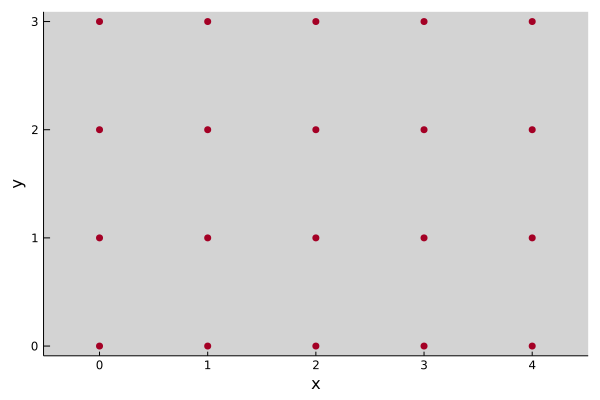

In [22]:
lat = Geometries2D.square()
display(lat)
plot(lat; supercell=[4,3])

Lattice dimension:     2
Space dimension:       3
Number of atoms:       2
Non-spatial dimension: 1
Basis:
3×3 Array{Float64,2}:
  1.5       1.5       0.0
 -0.866025  0.866025  0.0
  0.0       0.0       1.0
Orbital/atom coordinates: 
4×2 Array{Float64,2}:
 0.0  1.0
 0.0  0.0
 0.0  0.0
 0.0  1.0

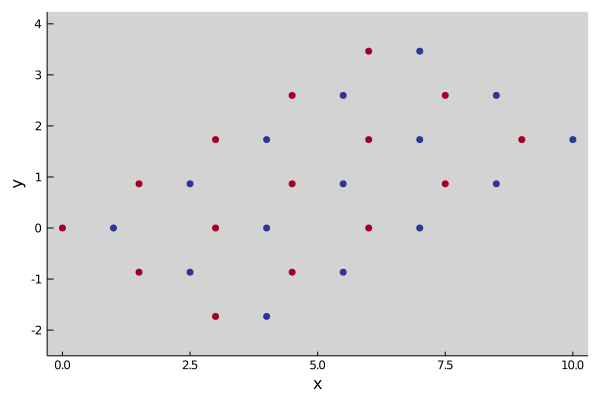

In [18]:
lat = Geometries2D.honeycomb()
display(lat)
plot(lat, "sublattice"; supercell=[2,4])

# Superlattice

Lattice dimension:     2
Space dimension:       3
Number of atoms:       12
Non-spatial dimension: 1
Basis:
3×3 Array{Float64,2}:
  1.5       9.0      0.0
 -0.866025  5.19615  0.0
  0.0       0.0      1.0
Orbital/atom coordinates: 
4×12 Array{Float64,2}:
 0.0  1.0  1.5       2.5       3.0      …  6.0     7.0     7.5      8.5
 0.0  0.0  0.866025  0.866025  1.73205     3.4641  3.4641  4.33013  4.33013
 0.0  0.0  0.0       0.0       0.0         0.0     0.0     0.0      0.0
 0.0  1.0  0.0       1.0       0.0         0.0     1.0     0.0      1.0

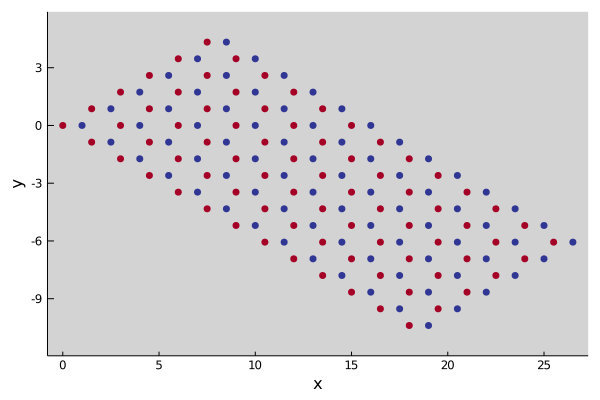

In [38]:
lat = Geometries2D.honeycomb()
slat = Structure.superlattice(lat, [[1, 0] [0, 6]])

display(slat)
plot(slat, "sublattice"; supercell=[12,0])

Lattice dimension:     2
Space dimension:       3
Number of atoms:       24
Non-spatial dimension: 1
Basis:
3×3 Array{Float64,2}:
 3.0    0.0     0.0
 0.0  -10.3923  0.0
 0.0    0.0     1.0
Orbital/atom coordinates: 
4×24 Array{Float64,2}:
  0.0       1.0       1.5       2.5      …  0.0  1.0   1.5        2.5
 -8.66025  -8.66025  -9.52628  -9.52628     0.0  0.0  -0.866025  -0.866025
  0.0       0.0       0.0       0.0         0.0  0.0   0.0        0.0
  0.0       1.0       0.0       1.0         0.0  1.0   0.0        1.0

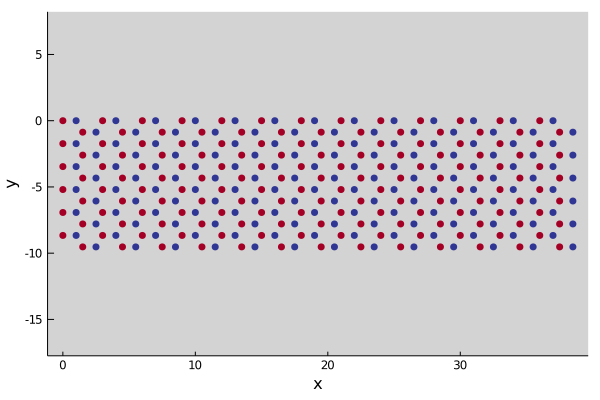

In [46]:
lat = Geometries2D.honeycomb()
slat = Structure.superlattice(lat, [[1, 1] [6, -6]])

display(slat)
plot(slat, "sublattice"; supercell=[12,0])

# Reducing lattice dimension

Lattice dimension:     1
Space dimension:       3
Number of atoms:       24
Non-spatial dimension: 1
Basis:
3×3 Array{Float64,2}:
 3.0    0.0     0.0
 0.0  -10.3923  0.0
 0.0    0.0     1.0
Orbital/atom coordinates: 
4×24 Array{Float64,2}:
  0.0       1.0       1.5       2.5      …  0.0  1.0   1.5        2.5
 -8.66025  -8.66025  -9.52628  -9.52628     0.0  0.0  -0.866025  -0.866025
  0.0       0.0       0.0       0.0         0.0  0.0   0.0        0.0
  0.0       1.0       0.0       1.0         0.0  1.0   0.0        1.0

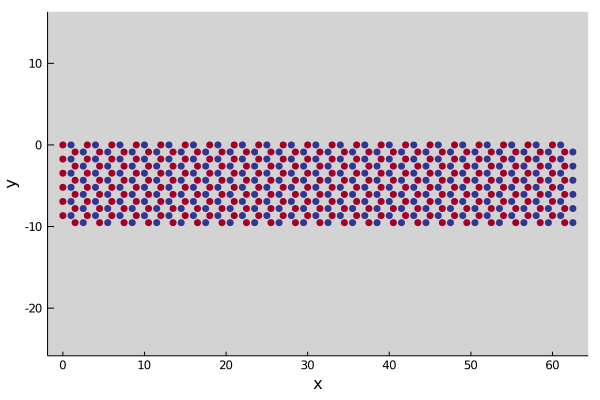

In [52]:
lat = Geometries2D.honeycomb()
lat_armchair = Structure.reduceto1D(lat, [[1, 1] [6, -6]])

display(lat_armchair)
plot(lat_armchair, "sublattice"; supercell=[20])

# Twisted lattices

In [53]:
lat = Geometries2D.honeycomb_twisted(10)

Twist α=3.15°   (n,m)=(10,1)


Lattice dimension:     2
Space dimension:       3
Number of atoms:       1324
Non-spatial dimension: 2
Basis:
3×3 Array{Float64,2}:
 31.5119       15.756   0.0
 -1.35447e-14  27.2901  0.0
  0.0           0.0     1.0
Orbital/atom coordinates: 
5×1324 Array{Float64,2}:
 0.0  16.7556  1.52323   2.52286   …  44.3166  44.269   46.2682  45.7922
 0.0  27.2626  0.824475  0.796992     25.4763  27.2077  27.2626  26.3832
 1.5   1.5     1.5       1.5          -1.5     -1.5     -1.5     -1.5
 0.0   1.0     0.0       1.0           0.0      0.0      1.0      0.0
 0.0   0.0     0.0       0.0           1.0      1.0      1.0      1.0

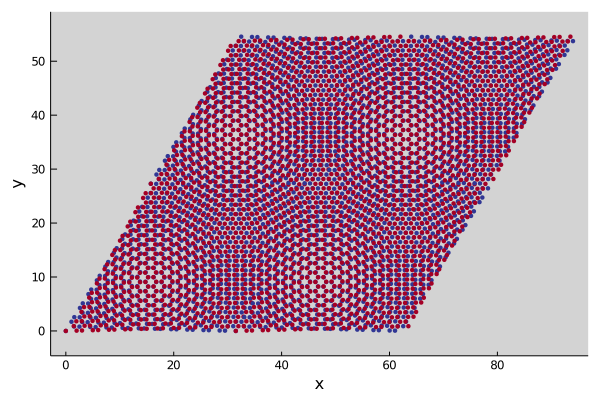

In [67]:
plot(lat, 3; supercell=1, markersize=2.5)